In [1]:
import numpy as np
from numpy.random import randn
import pandas as pd

# stats
from scipy import stats

# Plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
flight_dframe = sns.load_dataset('flights')

In [3]:
flight_dframe.head()

year     month  passengers
0  1949   January         112
1  1949  February         118
2  1949     March         132
3  1949     April         129
4  1949       May         121

In [4]:
flight_dframe = flight_dframe.pivot('month','year','passengers')
flight_dframe.head()

year      1949  1950  1951  1952  1953  1954  1955  1956  1957  1958  1959  \
month                                                                        
January    112   115   145   171   196   204   242   284   315   340   360   
February   118   126   150   180   196   188   233   277   301   318   342   
March      132   141   178   193   236   235   267   317   356   362   406   
April      129   135   163   181   235   227   269   313   348   348   396   
May        121   125   172   183   229   234   270   318   355   363   420   

year      1960  
month           
January    417  
February   391  
March      419  
April      461  
May        472

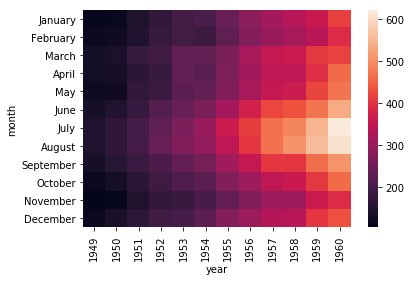

In [5]:
sns.heatmap(flight_dframe)

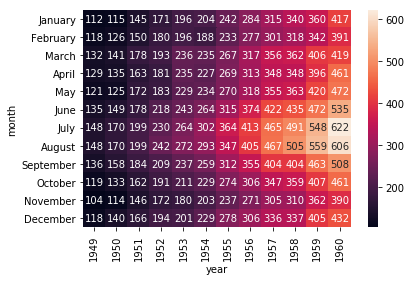

In [7]:
sns.heatmap(flight_dframe,annot=True,fmt='d')

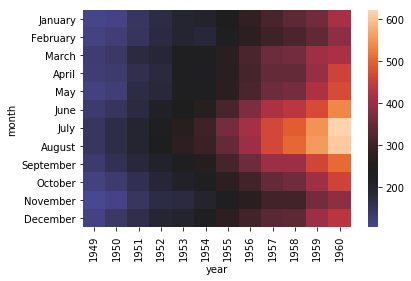

In [8]:
# specify the position to use as the center point

# results in 2 diff color schemes

sns.heatmap(flight_dframe,center=flight_dframe.loc['January',1955])

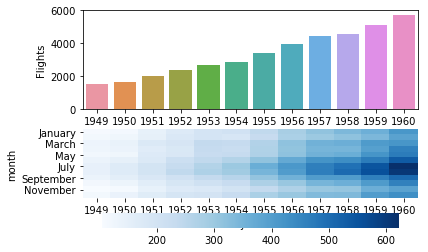

In [15]:
f,(axis1,axis2) = plt.subplots(2,1)

yearly_flights = flight_dframe.sum()

years = pd.Series(yearly_flights.index.values)
years = pd.DataFrame(years)

flights = pd.Series(yearly_flights.values)
flights = pd.DataFrame(flights)

year_dframe = pd.concat((years,flights),axis=1)
year_dframe.columns = ['Year','Flights']

sns.barplot('Year',y='Flights',data=year_dframe,ax=axis1)
sns.heatmap(flight_dframe,cmap='Blues',ax=axis2,cbar_kws={'orientation':'horizontal'})

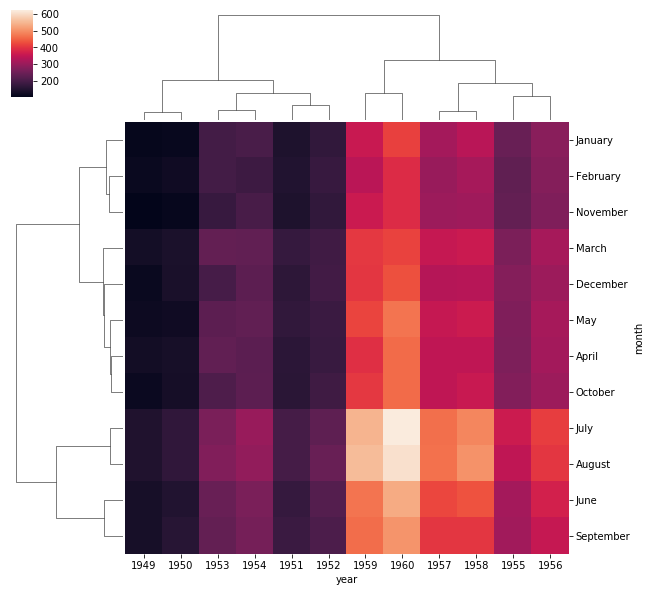

In [16]:
#cluster by both row and columns
sns.clustermap(flight_dframe)

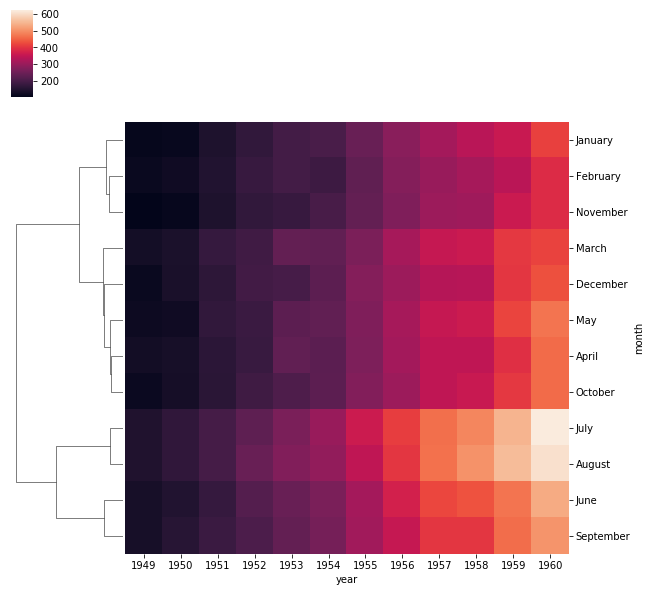

In [17]:
# clustering by rows (months) only
sns.clustermap(flight_dframe,col_cluster=False)

In [18]:
# standardizing by month to make uniform comparison
sns.clustermap(flight_dframe,standard_scale=1)

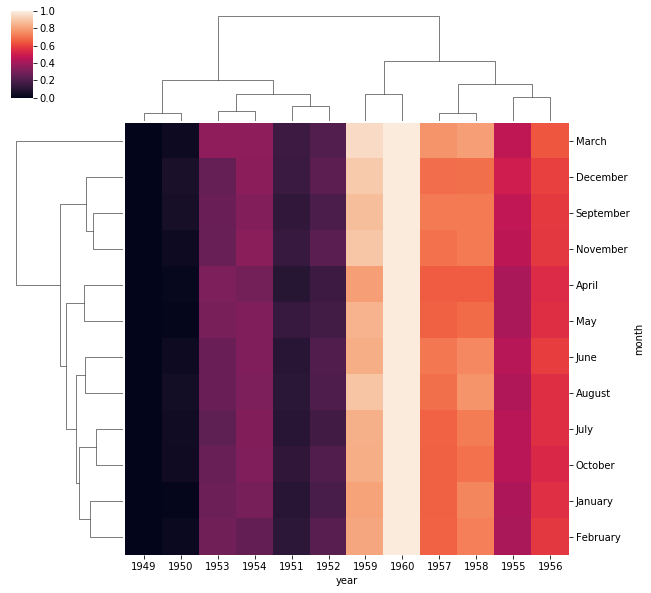

In [19]:
# standardizing by the other axis to make a year-by-year comparison
sns.clustermap(flight_dframe,standard_scale=0)

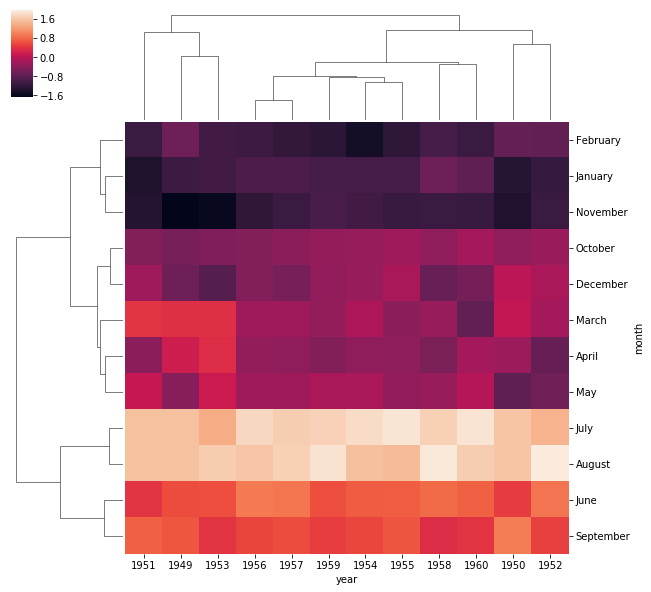

In [20]:
# normalize rows by their z-scores
sns.clustermap(flight_dframe,z_score=1)